### A notebook for Xulu to generate maze graphs for certain maze sequences!

First let's load the database of different barrier configurations

In [5]:
import pandas as pd
import pickle
import sys
sys.path.append("..")  # Use sys to add the parent directory (where hex_maze_utils lives) to the path

from hex_maze_utils import plot_hex_maze, plot_barrier_change_sequence, df_lookup

# Load the database of different barrier sequences
barrier_df = pd.read_pickle('../Barrier_Sequence_Databases/barrier_sequences_first1000.pkl')
display(barrier_df)

# Load the maze configuration database for info about different mazes
df = pd.read_pickle('../maze_configuration_database.pkl')

,barrier_sequence,sequence_length,reward_path_lengths,choice_points
0,"[(37, 7, 39, 41, 14, 46, 20, 23, 30), (37, 39,...",5,"[[15, 17, 21], [15, 21, 19], [15, 17, 19], [23...","[{13}, {26}, {26, 13, 29}, {29}, {13}]"
1,"[(34, 36, 37, 39, 10, 45, 14, 15, 20), (34, 37...",6,"[[17, 21, 19], [19, 21, 17], [19, 15, 17], [17...","[{21}, {30}, {24}, {16, 24, 26}, {24}, {35}]"
2,"[(34, 7, 41, 11, 46, 17, 20, 28, 31)]",1,"[[23, 19, 17]]",[{35}]
3,"[(34, 10, 42, 12, 45, 18, 23, 25, 31), (34, 37...",6,"[[15, 19, 21], [15, 19, 17], [21, 19, 15], [21...","[{17}, {17, 26, 35}, {35}, {24}, {24, 17, 26},..."
4,"[(39, 9, 10, 46, 21, 22, 23, 26, 30)]",1,"[[23, 17, 17]]",[{29}]
...,...,...,...,...
995,"[(32, 34, 45, 13, 14, 15, 18, 19, 25), (32, 34...",2,"[[19, 17, 15], [19, 15, 17]]","[{35}, {24}]"
996,"[(37, 7, 40, 13, 46, 45, 18, 25, 28), (37, 7, ...",2,"[[15, 19, 17], [17, 19, 15]]","[{26}, {36}]"
997,"[(36, 10, 11, 46, 15, 21, 25, 27, 29)]",1,"[[19, 15, 21]]",[{16}]
998,"[(32, 8, 9, 41, 15, 20, 21, 27, 29), (32, 8, 9...",2,"[[17, 21, 15], [17, 15, 21]]","[{31}, {13}]"


In [2]:
# Let's get the subset of the database with sequences>= length 5
barrier_df_long_sequences = barrier_df[barrier_df['sequence_length'] >= 5]
display(barrier_df_long_sequences)

,barrier_sequence,sequence_length,reward_path_lengths,choice_points
0,"[(37, 7, 39, 41, 14, 46, 20, 23, 30), (37, 39,...",5,"[[15, 17, 21], [15, 21, 19], [15, 17, 19], [23...","[{13}, {26}, {26, 13, 29}, {29}, {13}]"
1,"[(34, 36, 37, 39, 10, 45, 14, 15, 20), (34, 37...",6,"[[17, 21, 19], [19, 21, 17], [19, 15, 17], [17...","[{21}, {30}, {24}, {16, 24, 26}, {24}, {35}]"
3,"[(34, 10, 42, 12, 45, 18, 23, 25, 31), (34, 37...",6,"[[15, 19, 21], [15, 19, 17], [21, 19, 15], [21...","[{17}, {17, 26, 35}, {35}, {24}, {24, 17, 26},..."
9,"[(34, 39, 42, 11, 12, 16, 21, 27, 30), (34, 39...",5,"[[17, 25, 19], [17, 15, 19], [21, 15, 19], [17...","[{31}, {24, 13, 31}, {24}, {13}, {31}]"
11,"[(32, 37, 8, 40, 9, 11, 16, 21, 28), (32, 37, ...",5,"[[19, 21, 15], [19, 17, 15], [17, 17, 23], [21...","[{36}, {13, 36, 29}, {13}, {29}, {13}]"
...,...,...,...,...
957,"[(39, 9, 10, 42, 21, 22, 23, 25, 30), (39, 9, ...",5,"[[23, 17, 17], [15, 21, 17], [15, 17, 19], [15...","[{29}, {31}, {17}, {17, 29, 31}, {29}]"
958,"[(34, 37, 40, 10, 11, 15, 20, 22, 26), (34, 37...",6,"[[19, 21, 17], [19, 15, 17], [19, 15, 21], [17...","[{30}, {24}, {16}, {17}, {24}, {36}]"
962,"[(34, 39, 8, 42, 12, 46, 21, 27, 30), (34, 39,...",5,"[[17, 15, 19], [17, 25, 19], [21, 15, 19], [17...","[{24, 13, 31}, {31}, {24}, {13}, {31}]"
977,"[(34, 37, 7, 41, 10, 18, 25, 28, 30), (34, 37,...",5,"[[15, 19, 21], [15, 19, 17], [21, 19, 15], [17...","[{17}, {17, 26, 35}, {35}, {17, 35, 36}, {17}]"


Now lets plot some of the mazes for a sequence.

The barrier sequence is:
Barrier set 0: frozenset({np.int64(34), np.int64(36), np.int64(37), np.int64(39), np.int64(10), np.int64(45), np.int64(14), np.int64(15), np.int64(20)}), reward path lengths = [17, 21, 19]
Barrier set 1: frozenset({np.int64(34), np.int64(37), np.int64(39), np.int64(10), np.int64(45), np.int64(14), np.int64(15), np.int64(20), np.int64(26)}), reward path lengths = [19, 21, 17]
Barrier set 2: frozenset({np.int64(34), np.int64(37), np.int64(39), np.int64(10), np.int64(45), np.int64(14), np.int64(15), np.int64(25), np.int64(26)}), reward path lengths = [19, 15, 17]
Barrier set 3: frozenset({np.int64(34), np.int64(37), np.int64(39), np.int64(10), np.int64(45), np.int64(14), np.int64(15), np.int64(46), np.int64(25)}), reward path lengths = [17, 15, 19]
Barrier set 4: frozenset({np.int64(34), np.int64(37), np.int64(39), np.int64(45), np.int64(46), np.int64(14), np.int64(13), np.int64(15), np.int64(25)}), reward path lengths = [21, 15, 19]
Barrier set 5: frozenset({np.i

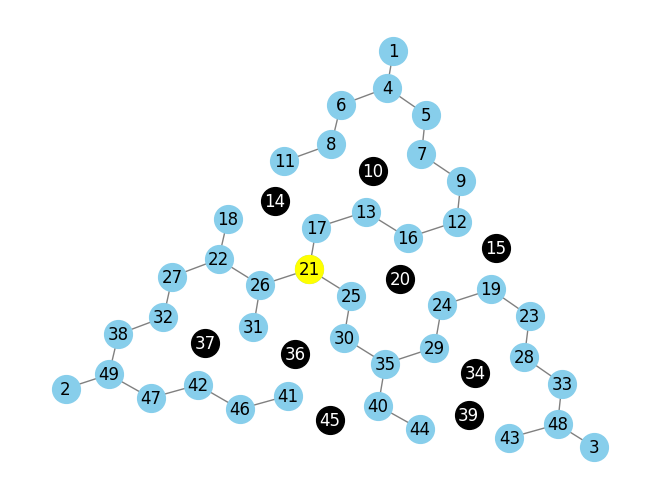

Barrier change: 36 -> 26
Barrier set 1: frozenset({np.int64(34), np.int64(37), np.int64(39), np.int64(10), np.int64(45), np.int64(14), np.int64(15), np.int64(20), np.int64(26)})


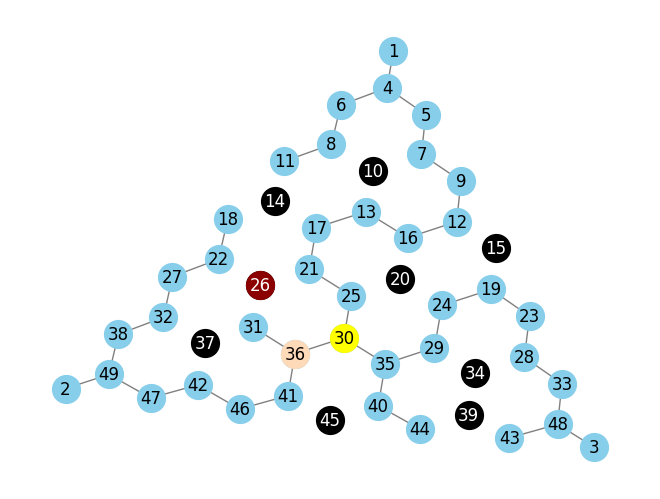

Barrier change: 20 -> 25
Barrier set 2: frozenset({np.int64(34), np.int64(37), np.int64(39), np.int64(10), np.int64(45), np.int64(14), np.int64(15), np.int64(25), np.int64(26)})


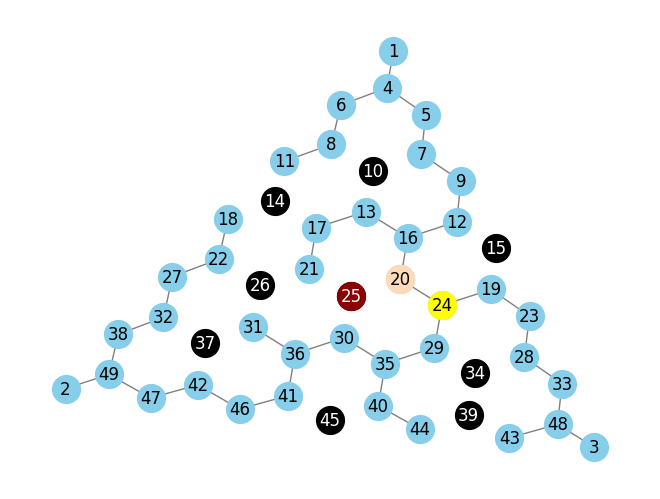

Barrier change: 26 -> 46
Barrier set 3: frozenset({np.int64(34), np.int64(37), np.int64(39), np.int64(10), np.int64(45), np.int64(14), np.int64(15), np.int64(46), np.int64(25)})


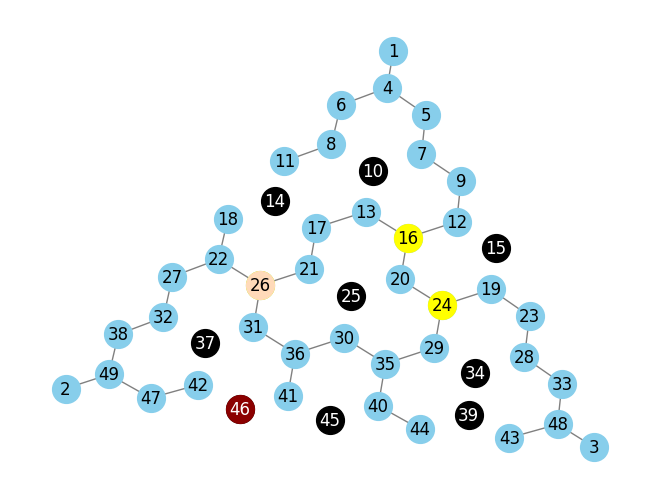

Barrier change: 10 -> 13
Barrier set 4: frozenset({np.int64(34), np.int64(37), np.int64(39), np.int64(45), np.int64(46), np.int64(14), np.int64(13), np.int64(15), np.int64(25)})


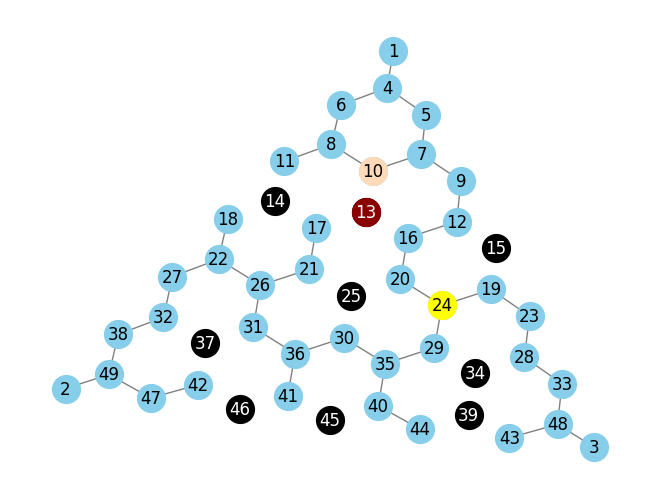

Barrier change: 39 -> 19
Barrier set 5: frozenset({np.int64(34), np.int64(37), np.int64(45), np.int64(46), np.int64(15), np.int64(14), np.int64(13), np.int64(19), np.int64(25)})


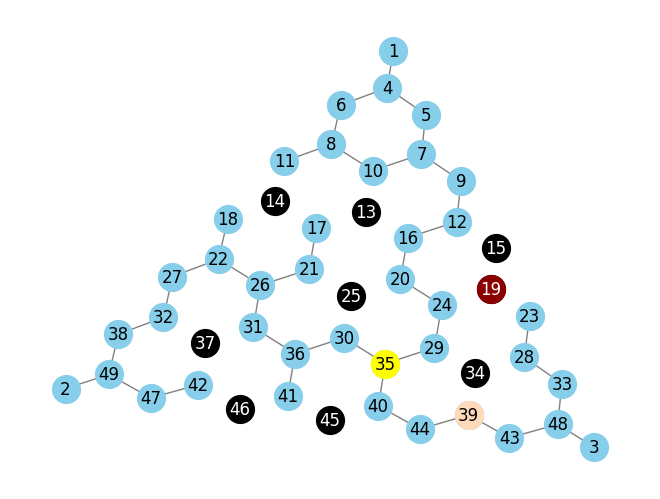

In [6]:
# Let's get a sequence from the database
i = 1 # change this number to get a different sequence
barrier_sequence = barrier_df.iloc[i]['barrier_sequence']

# Print each barrier set in the sequence + the reward path lengths
print(f"The barrier sequence is:")
for index, barriers in enumerate(barrier_sequence):
    rwd_path_lengths = df_lookup(df, barriers, 'reward_path_lengths')
    print(f"Barrier set {index}: {barriers}, reward path lengths = {rwd_path_lengths}")
print("\n")
    
# Plot all of the mazes in the sequence. 
print("Now let's plot the mazes in the sequence:")
plot_barrier_change_sequence(barrier_sequence)
    

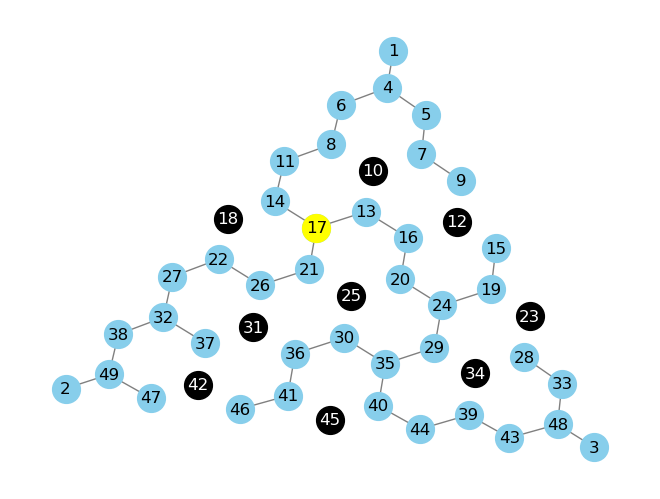

In [19]:
# It's also easy to copy/paste a set of barriers to plot them using plot_hex_maze
from hex_maze_utils import plot_hex_maze

b = {34, 10, 42, 12, 45, 18, 23, 25, 31}
plot_hex_maze(b)
